### What is the price distribution of menu items?


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
query_category_del = """
SELECT
    menu_items.name AS menu_item_name, 
    ROUND(AVG(price), 2) AS AVG_price
FROM 
    menu_items
    JOIN categories ON menu_items.restaurant_id  = categories.restaurant_id
WHERE price > 0 
GROUP BY
    menu_items.name
;

"""
query_category_tak = """
SELECT
    menuItems.name AS menu_item_name, 
    ROUND(AVG(price), 2) AS AVG_price
FROM 
    menuItems
WHERE price > 0 
GROUP BY
    menuItems.name
;

"""
query_category_uber = """ 

SELECT
    menu_items.name AS menu_item_name, 
    ROUND(AVG(price/ 100), 2) AS AVG_price
FROM 
    menu_items
WHERE price > 0 
GROUP BY
    menu_items.name
;

"""



In [ ]:
# Function for displaying the distribution of prices for menu items
def price_dist(data, range , c_name):
    plt.hist(data['AVG_price'], bins=50, color='skyblue', edgecolor='black')
    plt.xticks(range)
    plt.xlabel('€')
    plt.ylabel('Frequency')
    plt.title(f'Menu item Price distrubution for {c_name}')
    
    plt.show()
    
# Function for creating DF of price distribution intervals for menu items
def dist_table (data):
    bins = np.arange(0, 261, 5)
    frequencies, bin_edges = np.histogram(data['AVG_price'], bins=bins)      # frequency distribution
    distribution_table = pd.DataFrame({
        'Price Range (€)': [f'{bin_edges[i]} - {bin_edges[i+1]}' for i in range(len(bin_edges)-1)],
        'Frequency': frequencies
    })
    return distribution_table

In [4]:
takeaway_db = 'Databases/takeaway.db'
deliveroo_db ='Databases/deliveroo.db'
Uber_db ='Databases/ubereats.db'
def query_db(db, sql_query):
    ''' input: db (path to SQLite database), sql_query (str)
        output: pandas DataFrame
    '''
    conn = sqlite3.connect(db)
    with conn:
        res = pd.read_sql_query(sql_query, conn)
    if conn:
        conn.close()
    return res

In [5]:
takeaway_df = query_db(takeaway_db, query_category_tak)
deliveroo_df = query_db(deliveroo_db, query_category_del)
deliveroo_df = deliveroo_df[(deliveroo_df["AVG_price"] > 0) & (deliveroo_df["AVG_price"] < 250)]
uber_df = query_db(Uber_db, query_category_uber)

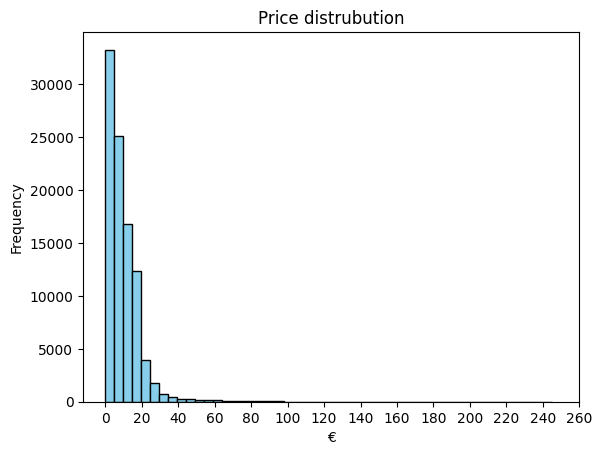

   Price Range (€)  Frequency
0            0 - 5      33793
1           5 - 10      25413
2          10 - 15      16630
3          15 - 20      12047
4          20 - 25       3776
5          25 - 30       1751
6          30 - 35        689
7          35 - 40        453
8          40 - 45        242
9          45 - 50        247
10         50 - 55        166
11         55 - 60        126
12         60 - 65        113
13         65 - 70        103
14         70 - 75         64
15         75 - 80         68
16         80 - 85         43
17         85 - 90         51
18         90 - 95         32
19        95 - 100         36
20       100 - 105         14
21       105 - 110         19
22       110 - 115         22
23       115 - 120         14
24       120 - 125          9
25       125 - 130         19
26       130 - 135          6
27       135 - 140          4
28       140 - 145          4
29       145 - 150          6
30       150 - 155         10
31       155 - 160          0
32       1

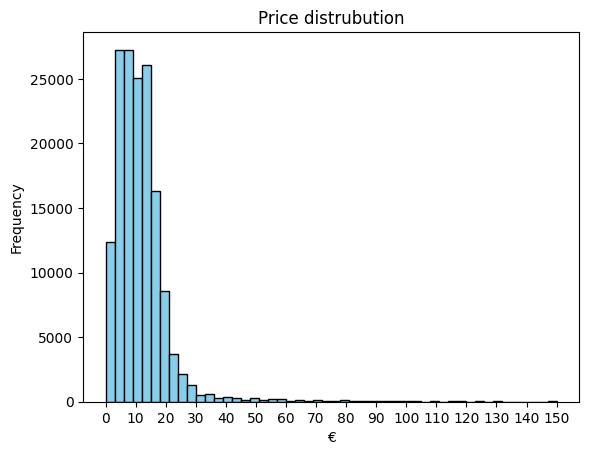

   Price Range (€)  Frequency
0            0 - 5      27582
1           5 - 10      44541
2          10 - 15      42244
3          15 - 20      25209
4          20 - 25       7440
5          25 - 30       2708
6          30 - 35       1045
7          35 - 40        792
8          40 - 45        426
9          45 - 50        408
10         50 - 55        328
11         55 - 60        271
12         60 - 65        207
13         65 - 70        200
14         70 - 75        142
15         75 - 80        146
16         80 - 85        107
17         85 - 90         81
18         90 - 95         52
19        95 - 100         88
20       100 - 105         51
21       105 - 110         36
22       110 - 115         55
23       115 - 120         38
24       120 - 125         44
25       125 - 130         32
26       130 - 135         28
27       135 - 140          9
28       140 - 145         11
29       145 - 150          6
30       150 - 155         22
31       155 - 160          0
32       1

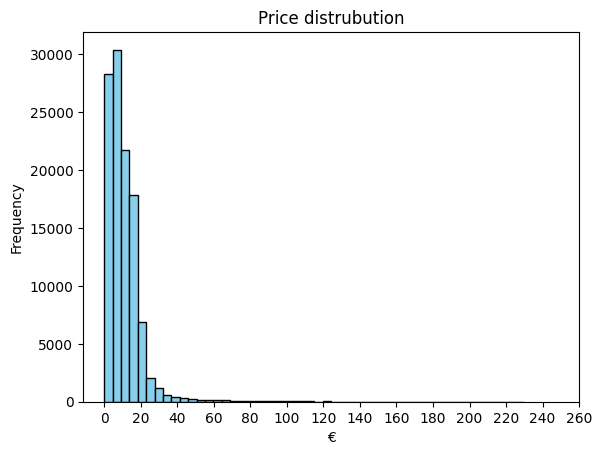

   Price Range (€)  Frequency
0            0 - 5      30320
1           5 - 10      31567
2          10 - 15      23987
3          15 - 20      15464
4          20 - 25       4610
5          25 - 30       1838
6          30 - 35        789
7          35 - 40        556
8          40 - 45        287
9          45 - 50        322
10         50 - 55        204
11         55 - 60        226
12         60 - 65        120
13         65 - 70        118
14         70 - 75         76
15         75 - 80         75
16         80 - 85         50
17         85 - 90         44
18         90 - 95         30
19        95 - 100         53
20       100 - 105         28
21       105 - 110         21
22       110 - 115         31
23       115 - 120         19
24       120 - 125         30
25       125 - 130          0
26       130 - 135          3
27       135 - 140          1
28       140 - 145          0
29       145 - 150          0
30       150 - 155          0
31       155 - 160          0
32       1

In [ ]:
price_dist(deliveroo_df, range =range(0, 261, 20), c_name = "Deliveroo")
print(dist_table(deliveroo_df))
price_dist(takeaway_df, range =range(0, 151, 10), c_name = "Takeaway")
print(dist_table(takeaway_df))
price_dist(uber_df, range =range(0, 261, 20), c_name = "Ubereats")
print(dist_table(uber_df))